In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [22]:

# Load an image
# image_path = 'path/to/your/image.jpg'
image = cv2.imread('../IMAGES/Sunrise.bmp', 0)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
# Convert image to a NumPy array
image_array = np.array(image)
image.shape

(2908, 6000)

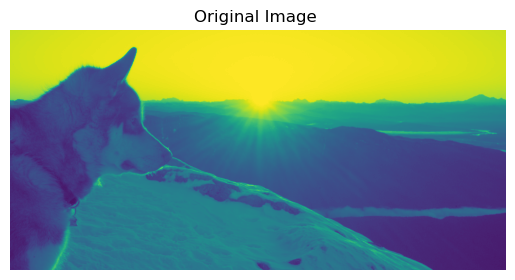

In [24]:
plt.imshow(image)
plt.title('Original Image ')
plt.axis('off')
plt.show()

In [26]:
# Function to divide the image into blocks
def divide_into_blocks(image_array, block_size):
    h, w = image_array.shape
    blocks = []
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = image_array[i:i+block_size, j:j+block_size]
            blocks.append(block)
    return blocks

# Function to stitch blocks back into an image
def stitch_blocks(blocks, image_shape, block_size):
    h, w = image_shape
    stitched_image = np.zeros(image_shape, dtype=blocks[0].dtype)
    index = 0
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            stitched_image[i:i+block_size, j:j+block_size] = blocks[index]
            index += 1
    return stitched_image

In [30]:
# Define block size
block_size = 50  # Adjust as needed

# Divide the image into blocks
blocks = divide_into_blocks(image_array, block_size)

# Shuffle the blocks
shuffled_indices = np.random.permutation(len(blocks))
shuffled_blocks = [blocks[i] for i in shuffled_indices]

# Stitch the shuffled blocks to create the puzzle
shuffled_image = stitch_blocks(shuffled_blocks, image_array.shape, block_size)

# Display the shuffled image (puzzle)
plt.imshow(shuffled_image)
plt.title('Shuffled Image (Puzzle)')
plt.axis('off')
plt.show()

# Reconstruct the original image by unshuffling the blocks
unshuffled_blocks = [None] * len(blocks)
for i, idx in enumerate(shuffled_indices):
    unshuffled_blocks[idx] = shuffled_blocks[i]

# Stitch the unshuffled blocks to recreate the original image
reconstructed_image = stitch_blocks(unshuffled_blocks, image_array.shape, block_size)

# Display the reconstructed image
plt.imshow(reconstructed_image)
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()

ValueError: could not broadcast input array from shape (8,50) into shape (50,50)

In [ ]:
# 1. Read a color image.
# 2. Display it.
# 3. Resize it.
# 4. Convert image from Color to Gray scale.
# 4. Display original color image, gray image and resized image in a subplot.

In [4]:
image2 = cv2.imread('../IMAGES/clown.bmp', 0)

In [6]:
def img_resize(image, width, height):
    new_dimensions = (width, height)

    # Resize the image
    resized_image = cv2.resize(image, new_dimensions, interpolation=cv2.INTER_LINEAR)
    return resized_image


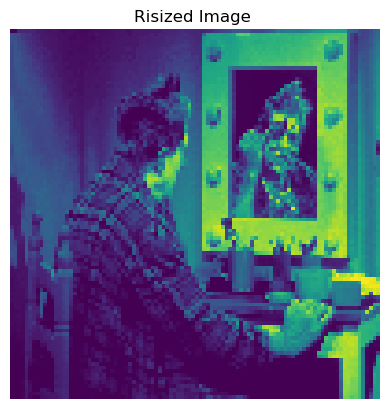

In [8]:
resized_image = img_resize(image2, 100, 100)

plt.imshow(resized_image)
plt.title('Risized Image ')
plt.axis('off')
plt.show()


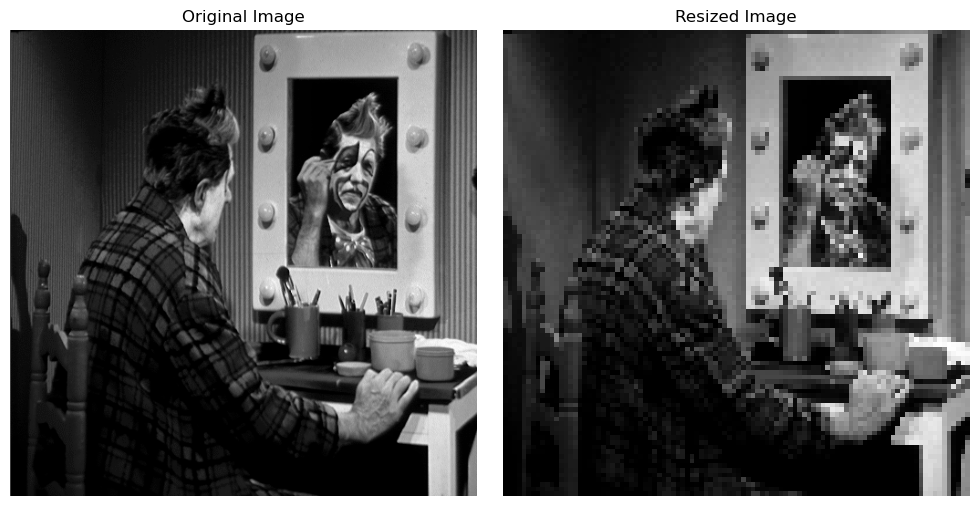

In [60]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image2, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_image, cmap='gray')
plt.title('Resized Image')
plt.axis('off')

plt.tight_layout()
plt.show()

In [10]:
cv2.imshow( 'Original Image', image2)
cv2.imshow('Resized Image', resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

(100, 100, 3)